In [36]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import PIL
%matplotlib inline
import os
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/DLProjects/JapaNet

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/DLProjects/JapaNet


In [7]:
train = pd.read_csv('train.csv')
print(f'Number of samples: {len(train)}')
train.head()

Number of samples: 3605


,image_id,labels
0,100241706_00004_2,U+306F 1231 3465 133 53 U+304C 275 1652 84 69 ...
1,100241706_00005_1,U+306F 1087 2018 103 65 U+304B 1456 1832 40 73...
2,100241706_00005_2,U+306F 572 1376 125 57 U+306E 1551 2080 69 68 ...
3,100241706_00006_1,U+3082 1455 3009 65 44 U+516B 1654 1528 141 75...
4,100241706_00007_2,U+309D 1201 2949 27 33 U+309D 1196 1539 27 36 ...


In [17]:
character_dict = pd.read_csv('unicode_translation.csv')
print(f'Number of characters: {len(character_dict)}')
character_dict[:9]

Number of characters: 4781


,Unicode,char
0,U+0031,1
1,U+0032,2
2,U+0034,4
3,U+0036,6
4,U+0039,9
5,U+003F,?
6,U+2000B,𠀋
7,U+20D45,𠵅
8,U+2123D,𡈽


In [18]:
ims = os.listdir("train")
print(f'Number of images: {len(ims)}')

Number of images: 3605


In [24]:
class JapChar():
    def __init__(self, char_data, im_id):
        self.char = char_data[0]
        self.x = int(char_data[1])
        self.y = int(char_data[2])
        self.width = int(char_data[3])
        self.height = int(char_data[4])
        self.im_id = im_id
        
    def get_area(self):
        return self.width * self.height

    def get_file(self):
        return "train/" + self.im_id + ".jpg";
    
    def get_top_left(self):
        return [self.x, self.y]
    
    def get_bottom_right(self):
        return [self.x + self.width, self.y + self.height]
    
    def show(self):
        plt.figure(figsize = (6, 6))
        im = PIL.Image.open(self.get_file())
        im = im.crop(self.get_top_left()  + self.get_bottom_right())
        plt.imshow(im)

class ScripturePage:
    def __init__(self, im_data):
        self.id = im_data[0]
        if type(im_data[1]) is not float:
            split_labels = im_data[1].split()
            self.labels = [JapChar(split_labels[i: i+5], self.id) for i in range(0, len(split_labels), 5)]
        else:
            self.labels = []
        
    def get_file(self):
        return "train/" + self.id + ".jpg";
    
    def show(self):
        plt.figure(figsize  = (10, 10))
        plt.imshow(plt.imread(self.get_file()))
        
    def get_im(self):
        return PIL.Image.open(self.get_file());
    
    def show_labeled(self):
        plt.figure(figsize  = (10, 10))
        ax = plt.gca()
        plt.imshow(self.get_im())
        
        for label in self.labels:
            box = Rectangle((label.x, label.y), label.width, label.height, fill = False, edgecolor = 'r')
            ax.add_patch(box)
            
        plt.show()

In [25]:
data = [ScripturePage(train.loc[i]) for i in range(len(train))]

Example of a single character and page

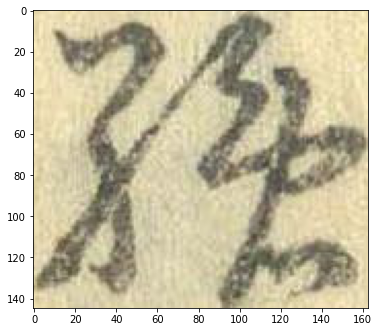

In [26]:
page = data[0]
page.labels[25].show()

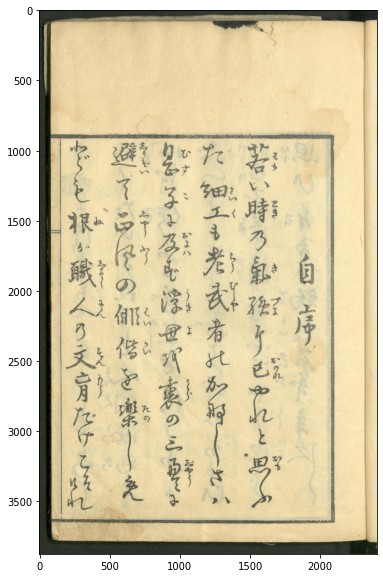

In [27]:
page.show()

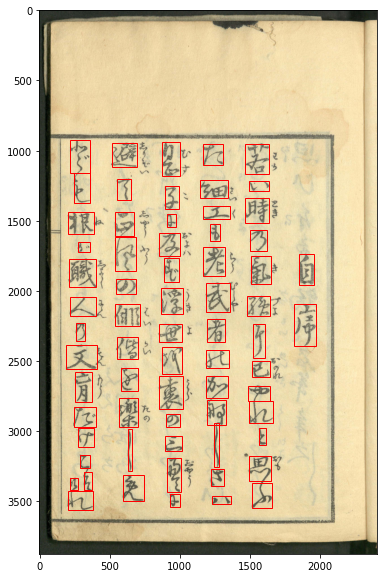

In [28]:
page.show_labeled()

Puts all of the characters from the training set into one list called all_chars

In [29]:
all_chars = []
for page in data:
    all_chars = all_chars + page.labels

Total number of characters in the training set

In [30]:
len(all_chars)

683464

A histogram of the areas of the characters

(array([5.91288e+05, 8.17730e+04, 8.00400e+03, 1.76300e+03, 4.20000e+02,
        1.07000e+02, 4.10000e+01, 2.20000e+01, 1.00000e+01, 9.00000e+00,
        1.30000e+01, 3.00000e+00, 3.00000e+00, 2.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 2.00000e+00]),
 array([1.2600000e+02, 1.2191450e+04, 2.4256900e+04, 3.6322350e+04,
        4.8387800e+04, 6.0453250e+04, 7.2518700e+04, 8.4584150e+04,
        9.6649600e+04, 1.0871505e+05, 1.2078050e+05, 1.3284595e+05,
        1.4491140e+05, 1.5697685e+05, 1.6904230e+05, 1.8110775e+05,
        1.9317320e+05, 2.0523865e+05, 2.1730410e+05, 2.2936955e+05,
        2.4143500e+05]),
 <a list of 20 Patch objects>)

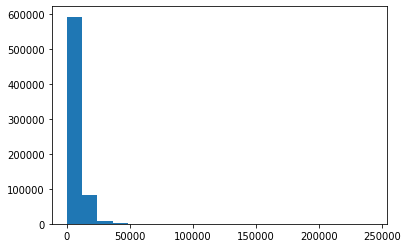

In [32]:
all_char_areas = [char.get_area() for char in all_chars]
plt.hist(all_char_areas, 20)

Frequency of each character in the training set

In [33]:
char_freq = character_dict.copy()
codes = np.array(char_freq["Unicode"])
freqs = np.zeros(len(char_freq))

for char in all_chars:
    freqs[np.where(codes == char.char)[0]] += 1
    
char_freq["Frequency"] = freqs
char_freq.describe()

,Frequency
count,4781.000000
mean,142.949592
std,1039.862407
min,0.000000
25%,1.000000
50%,6.000000
75%,33.000000
max,24685.000000


In [43]:
char_freq.sort_values('Frequency', inplace=True, ascending=False)
char_freq.head()

,Unicode,char,Frequency
88,U+306B,に,24685.0
91,U+306E,の,24136.0
68,U+3057,し,22209.0
83,U+3066,て,20569.0
85,U+3068,と,16588.0


[[]]

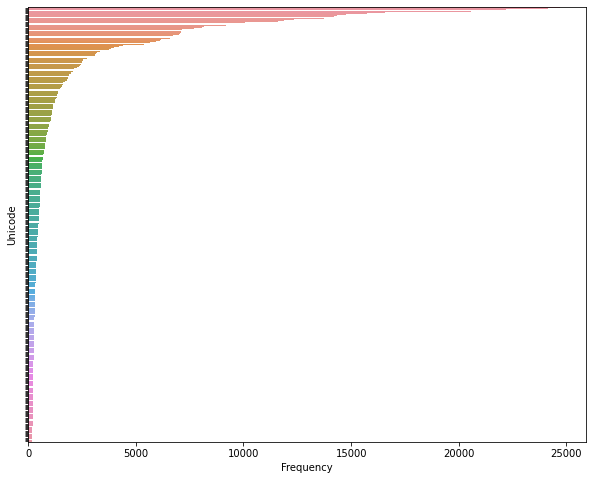

In [49]:
plt.figure(figsize=(10,8))
freqPlot = sns.barplot(x=char_freq.iloc[:369, :]['Frequency'], y=char_freq.iloc[:369, :]['Unicode'])
freqPlot.set(yticklabels=[])